# EDA

In [ ]:
y_train.value_counts()

,count
Churn_Yes,
0,3622
1,1308


<Axes: >

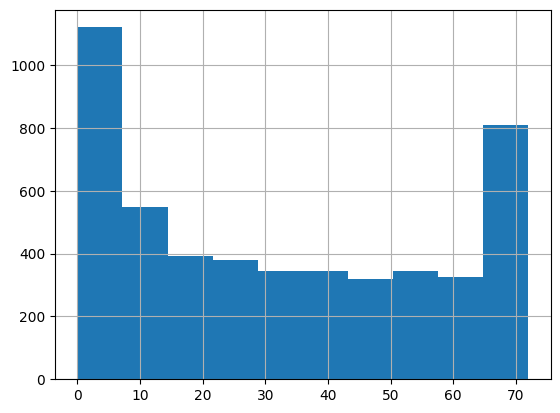

In [ ]:
X_train['tenure'].hist()

In [ ]:
X_train


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5557,0,5,80.20,384.25,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2270,1,3,86.85,220.95,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
6930,0,3,75.15,216.75,0,1,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
2257,0,60,80.55,4847.05,0,0,0,1,0,1,...,0,1,0,1,1,0,0,1,0,0
898,0,12,98.90,1120.95,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,0,63,104.50,6590.80,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1488,0,1,51.25,51.25,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6303,0,71,109.25,7707.70,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2710,0,24,20.40,482.80,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0


make column name to lower and remove whitespace

In [ ]:
X_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
# Now, implement the user's decision: replace whitespaces with underscores in column names
X_train.columns = X_train.columns.str.replace(' ', '_').str.lower()
X_val.columns = X_val.columns.str.replace(' ', '_').str.lower()
X_test.columns = X_test.columns.str.replace(' ', '_').str.lower()

separate categorical columns

In [ ]:
X_train.nunique()

,0
seniorcitizen,2
tenure,73
monthlycharges,1448
totalcharges,4653
gender_male,2
partner_yes,2
dependents_yes,2
phoneservice_yes,2
multiplelines_no_phone_service,2
multiplelines_yes,2


In [ ]:

cat_cols = [ col for col in X_train.columns if X_train[col].nunique() == 2 ]

In [ ]:
cat_cols

['seniorcitizen',
 'gender_male',
 'partner_yes',
 'dependents_yes',
 'phoneservice_yes',
 'multiplelines_no_phone_service',
 'multiplelines_yes',
 'internetservice_fiber_optic',
 'internetservice_no',
 'onlinesecurity_no_internet_service',
 'onlinesecurity_yes',
 'onlinebackup_no_internet_service',
 'onlinebackup_yes',
 'deviceprotection_no_internet_service',
 'deviceprotection_yes',
 'techsupport_no_internet_service',
 'techsupport_yes',
 'streamingtv_no_internet_service',
 'streamingtv_yes',
 'streamingmovies_no_internet_service',
 'streamingmovies_yes',
 'contract_one_year',
 'contract_two_year',
 'paperlessbilling_yes',
 'paymentmethod_credit_card_(automatic)',
 'paymentmethod_electronic_check',
 'paymentmethod_mailed_check']

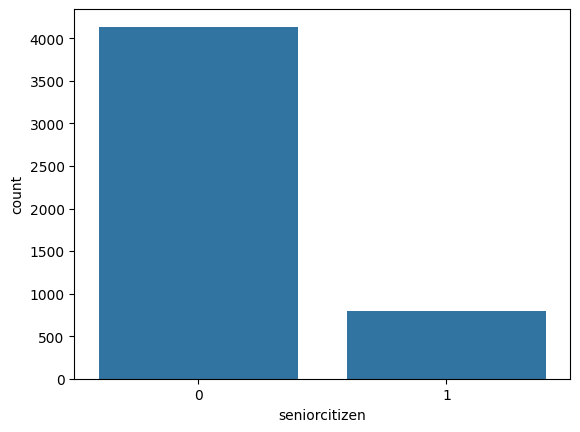

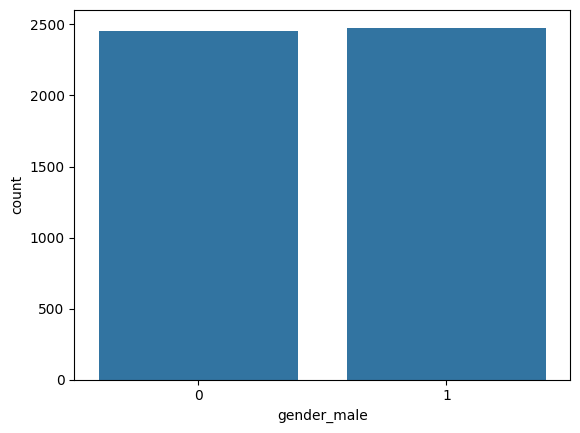

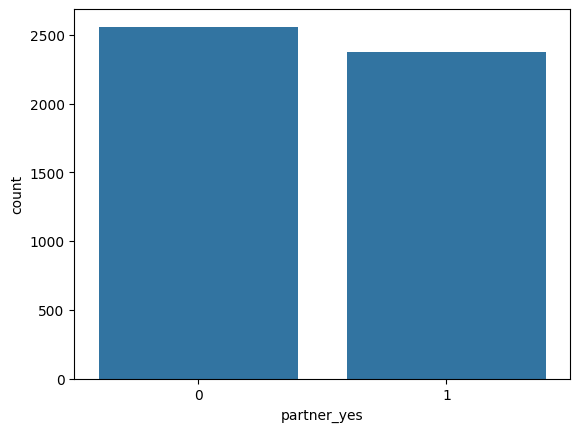

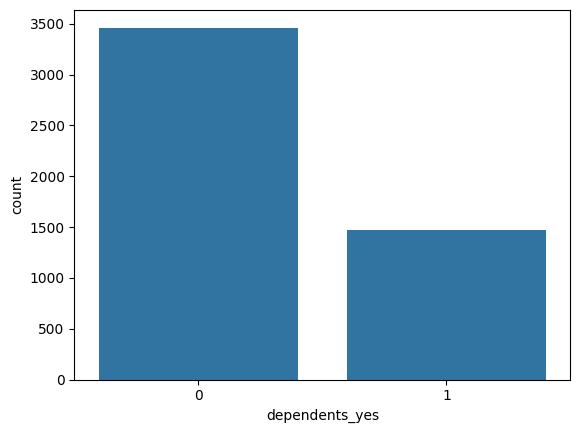

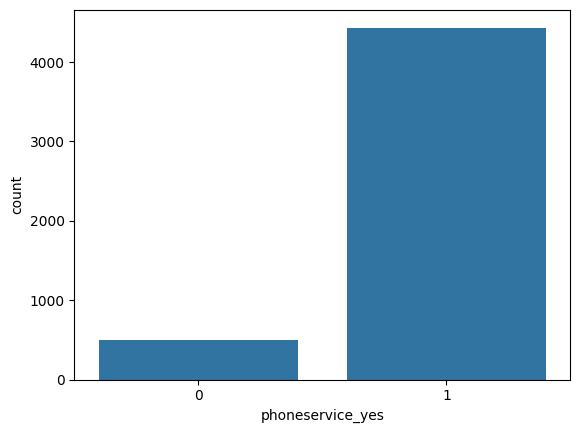

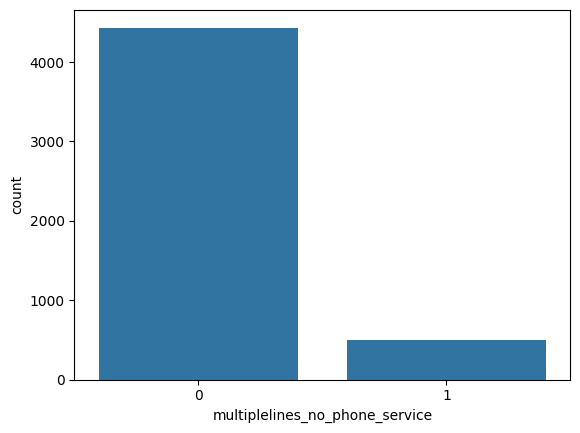

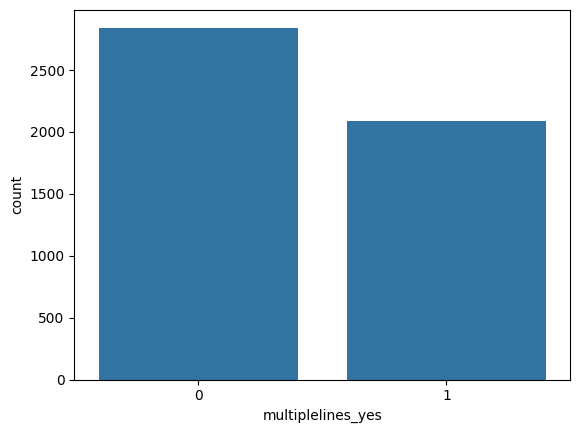

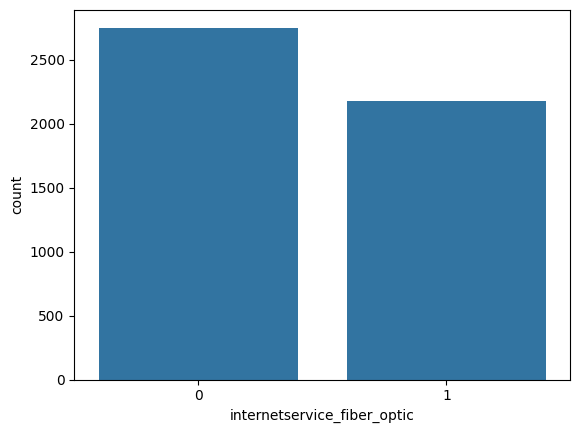

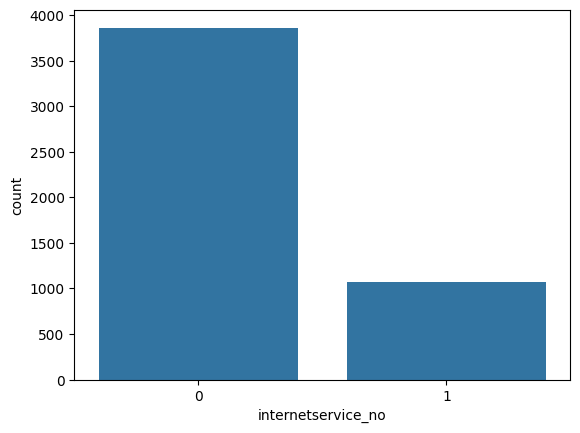

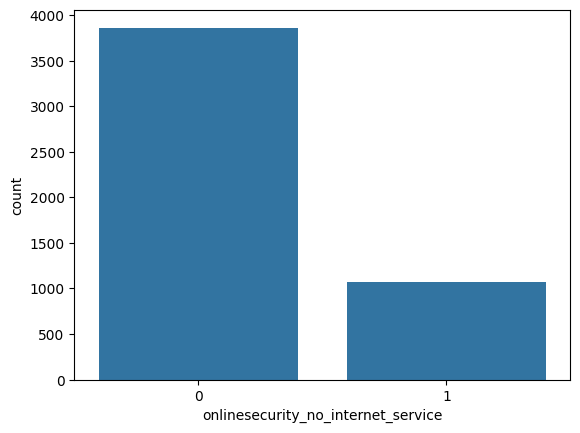

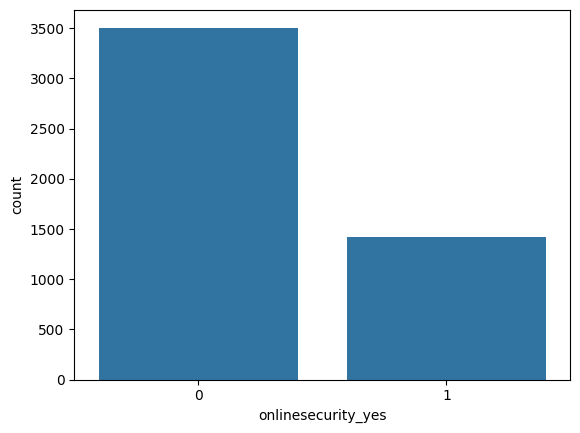

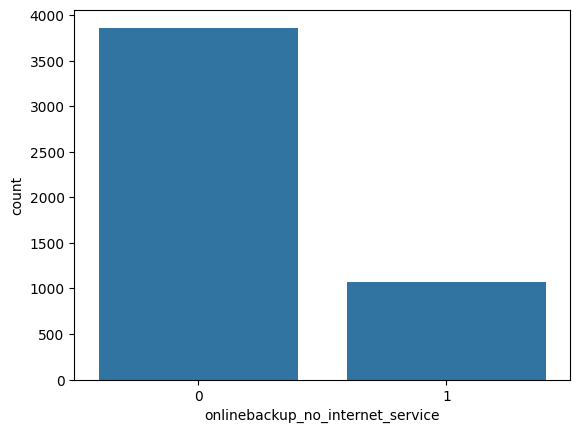

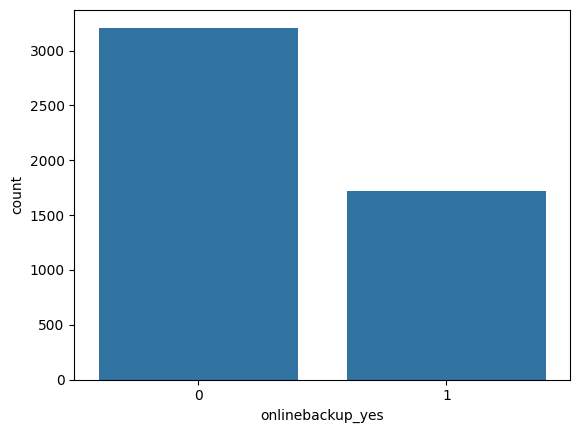

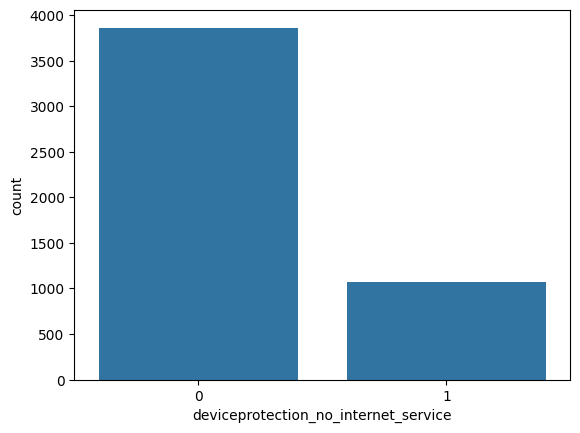

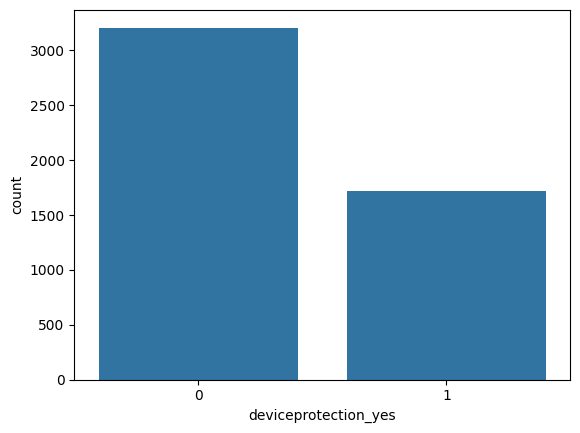

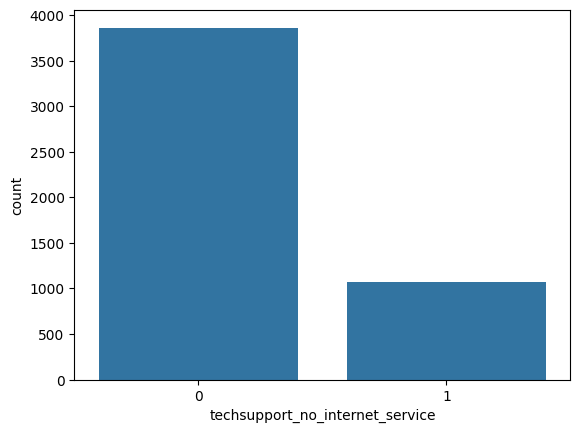

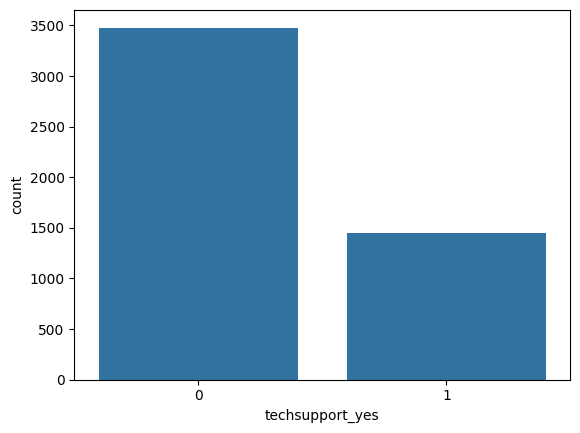

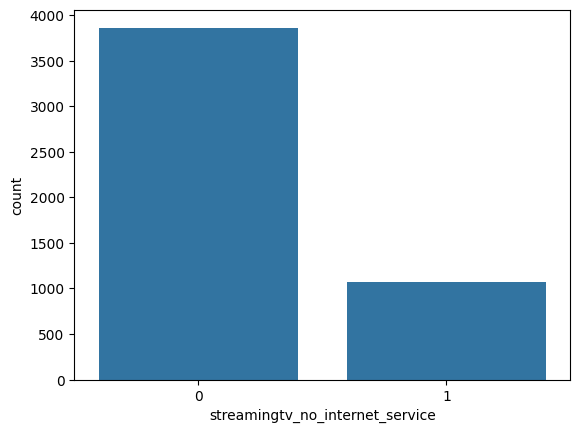

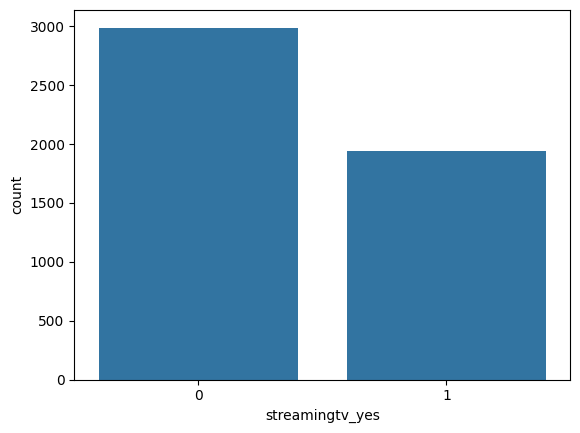

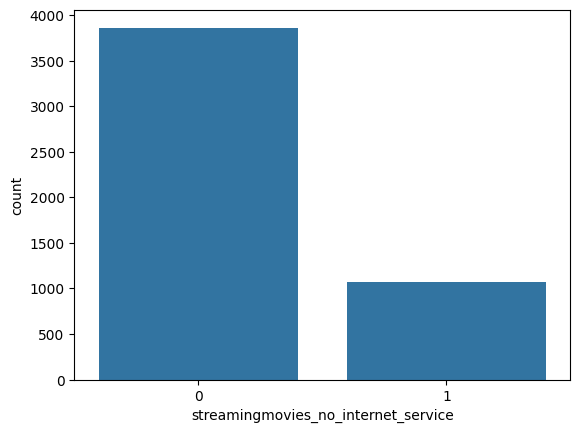

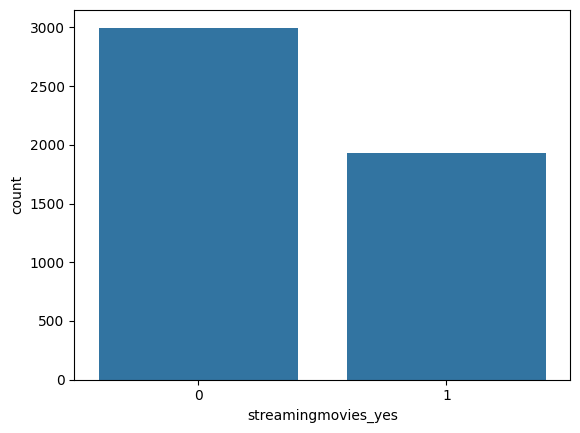

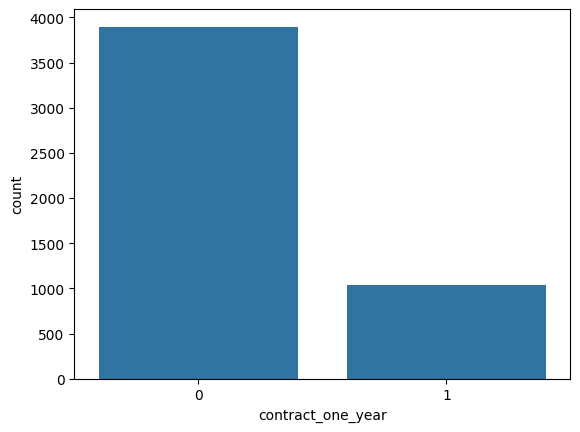

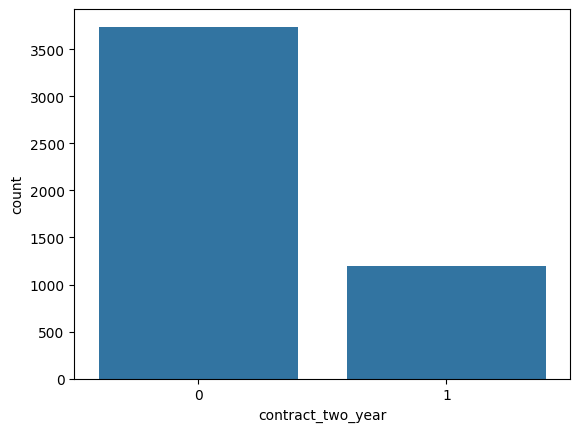

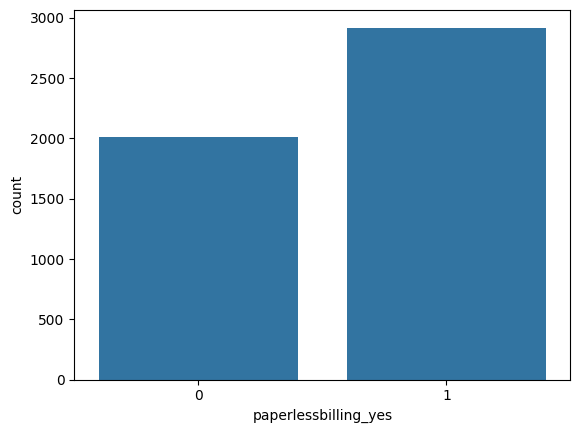

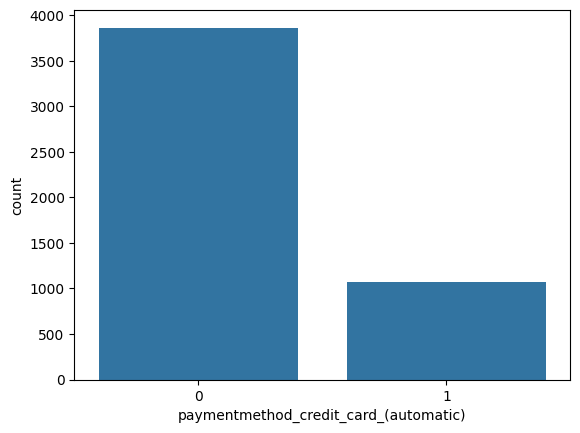

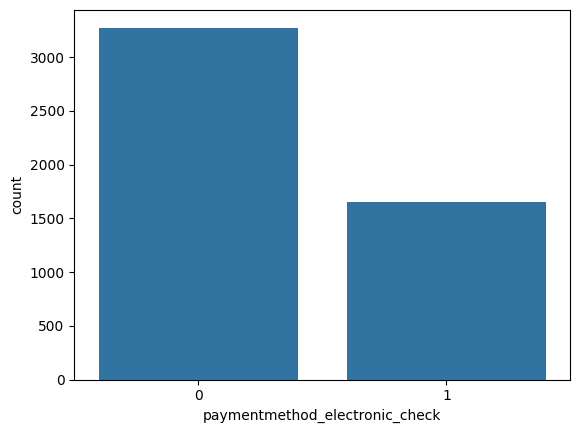

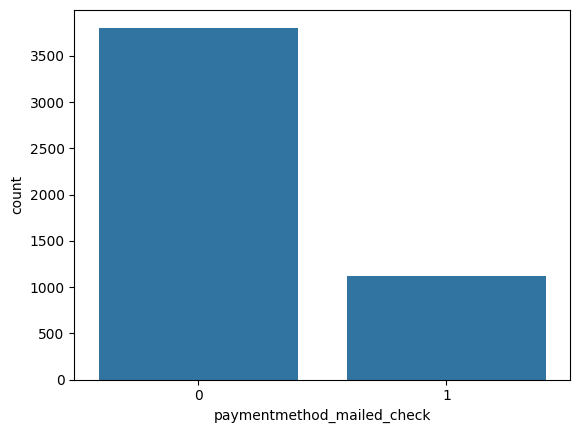

In [ ]:
for col in cat_cols:
  sbn.countplot(x = col , data = X_train)
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [ ]:
#--------------------------OBSERVESIONS-------------------------
# 1.senior citezen has very lower count (imbalanced ) in dataset , 2. there are half of the dependents than independend (higher)
# 3. those who not taken phone service are significantly lower than who took phone service ,
# 4. who have mulitple_no_phone_service are way lasser than who have not,
# 5. multiplelines_yes has lower count than who are not.
# 6. internetservice_no have significantly lower than 'yes'.
# 7. onlinesecurity_no_internet_service 'yes' count is significantly lower than 'no' counts
# -in-shor- : there are so many imbalanced counts in features are present in the dataset.



bivariate analysis

In [ ]:
X_test.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_male', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_one_year', 'contract_two_year', 'paperlessbilling_yes',
       'paymentmethod_credit_card_(automatic)',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'],
      dtype='object')

In [ ]:
y_test

,Churn_Yes
2064,0
3762,0
2109,0
3510,0
2394,0
...,...
4848,1
3905,1
1267,0
2036,0


In [ ]:
temp_ds = pd.concat([X_train , y_train] , axis= 1)

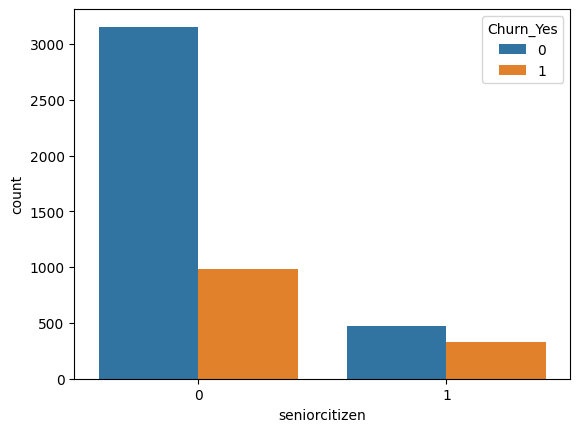

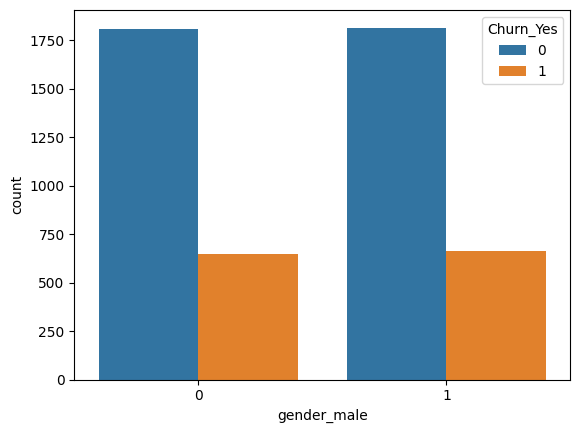

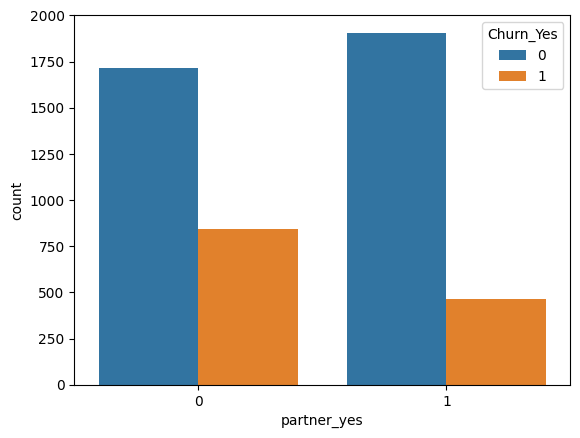

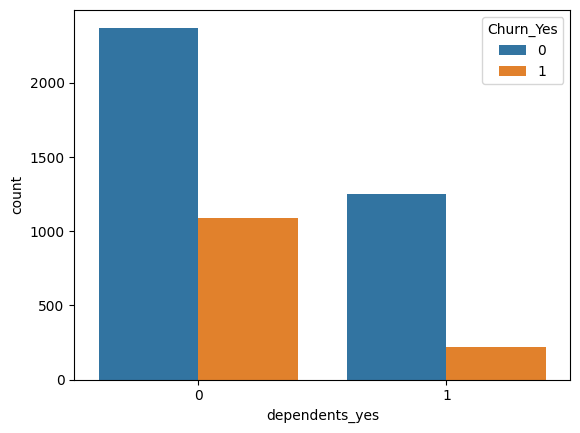

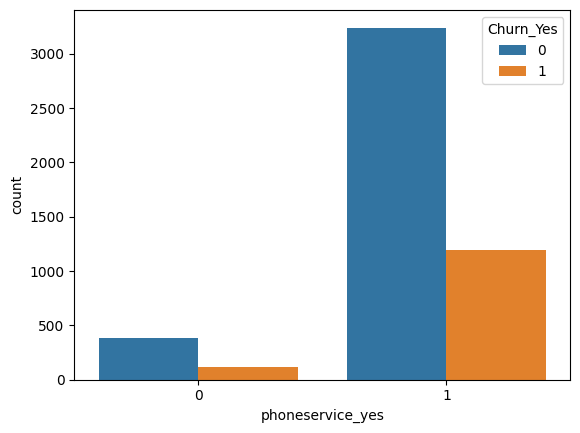

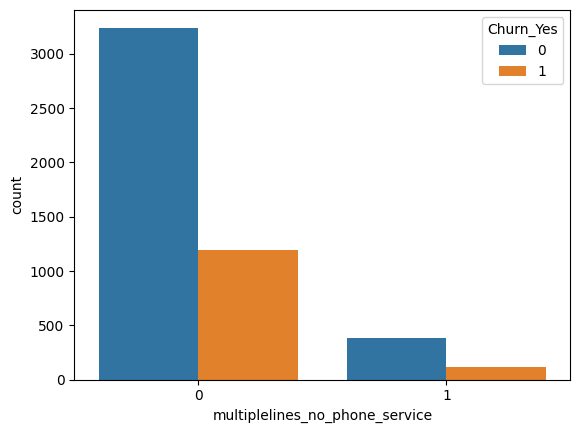

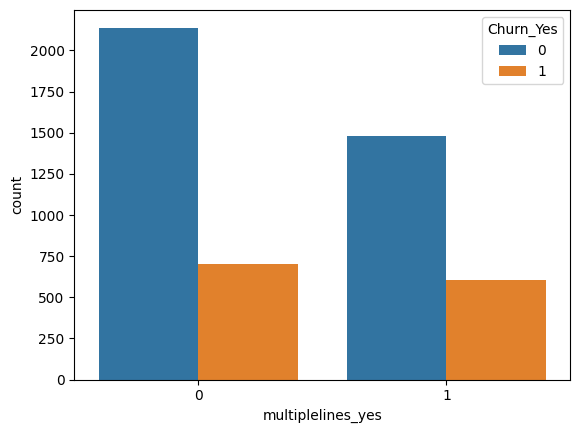

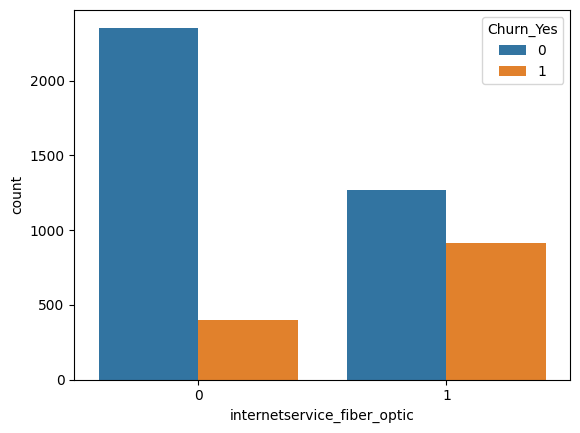

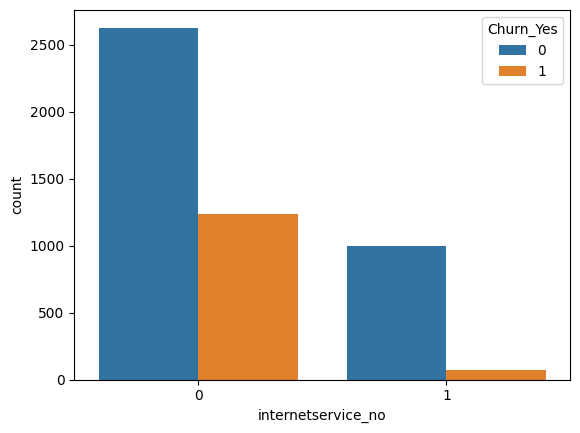

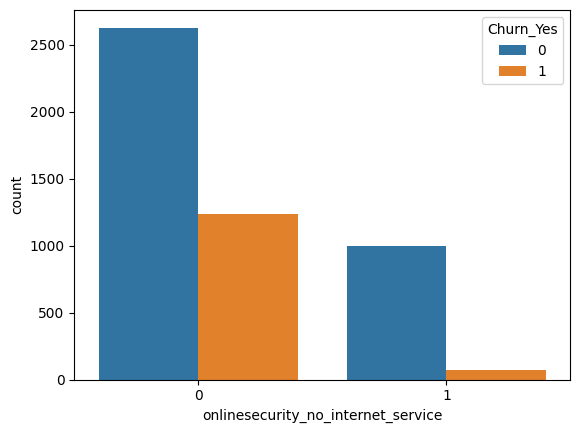

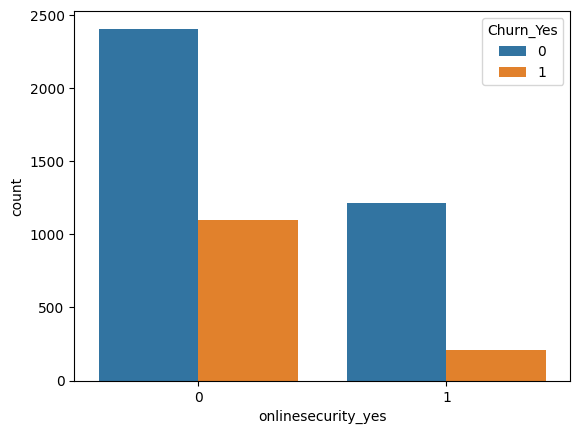

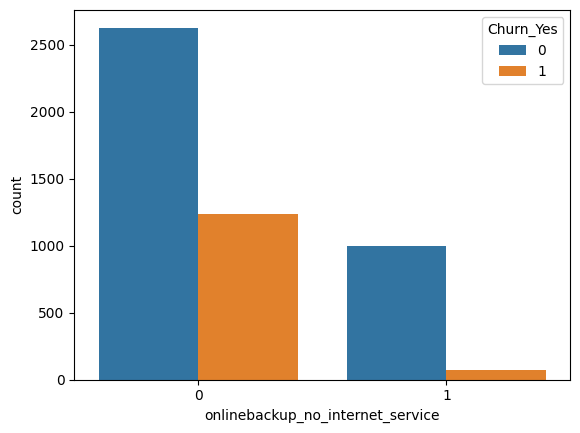

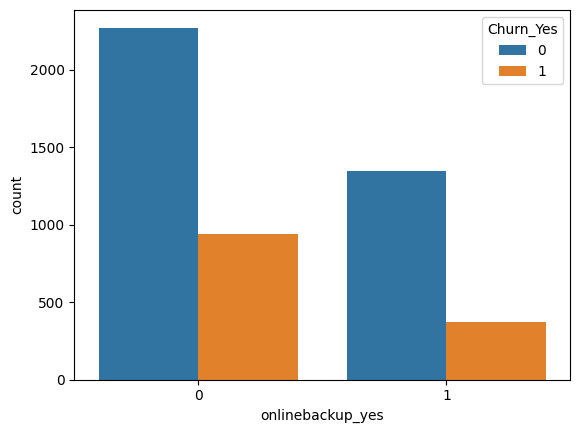

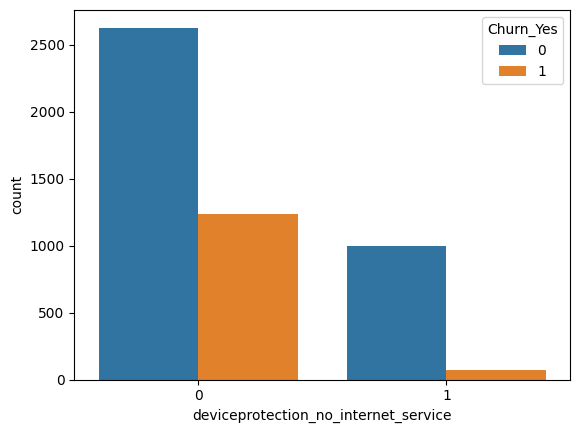

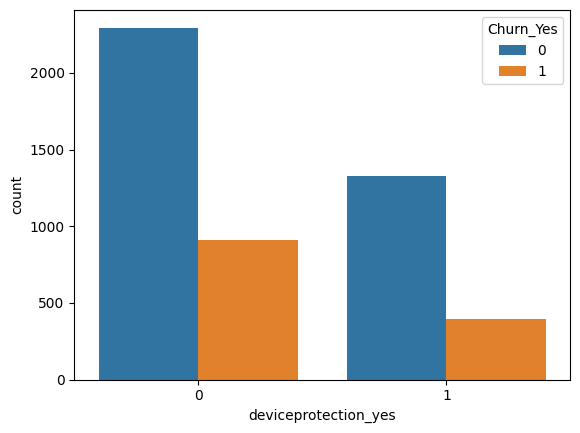

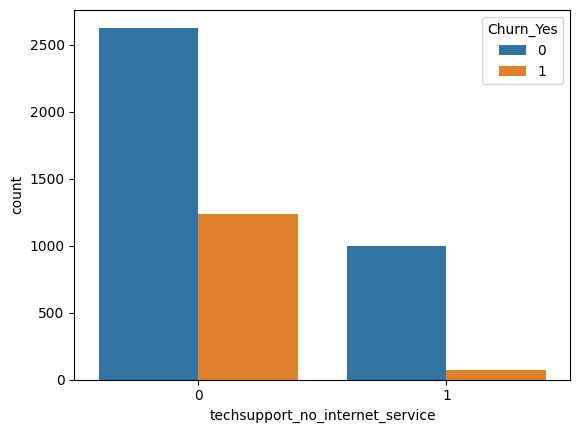

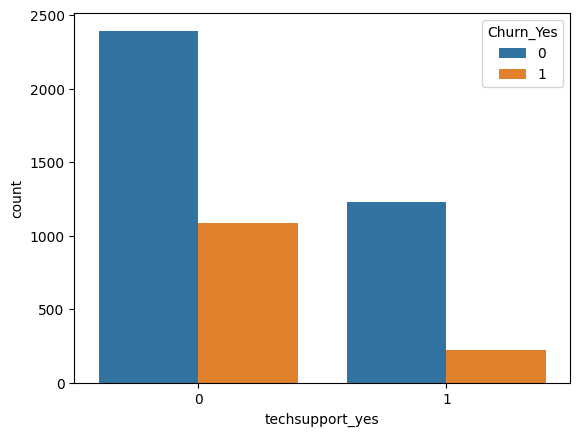

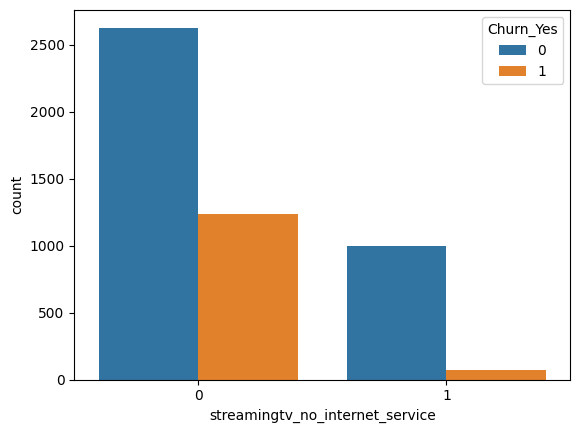

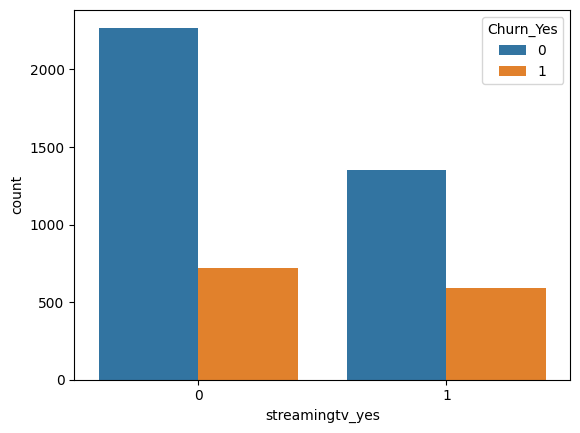

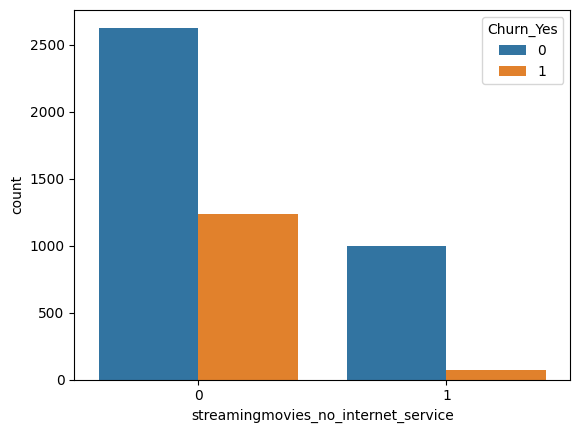

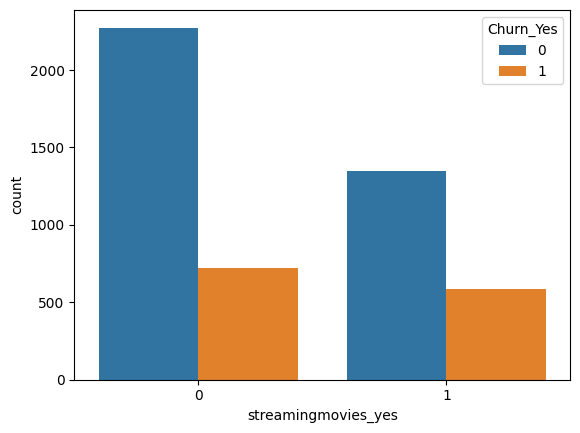

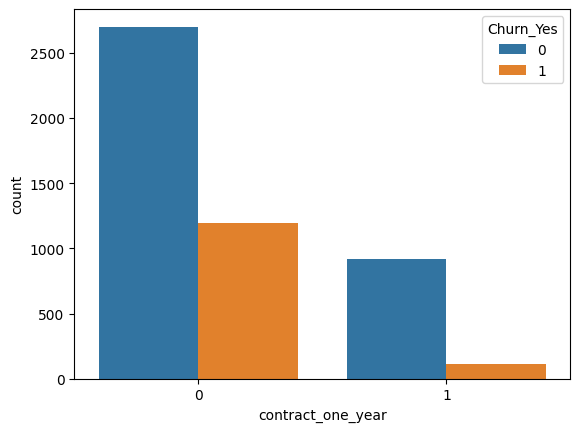

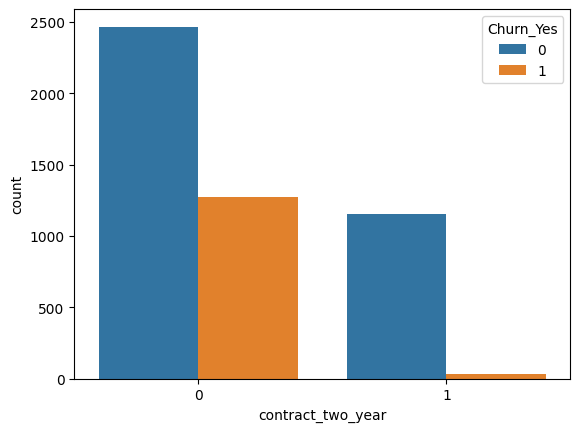

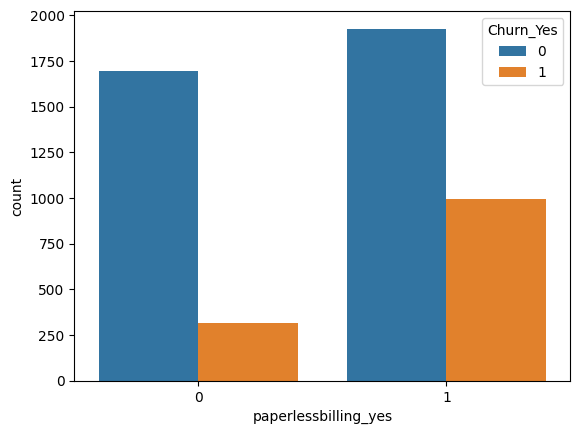

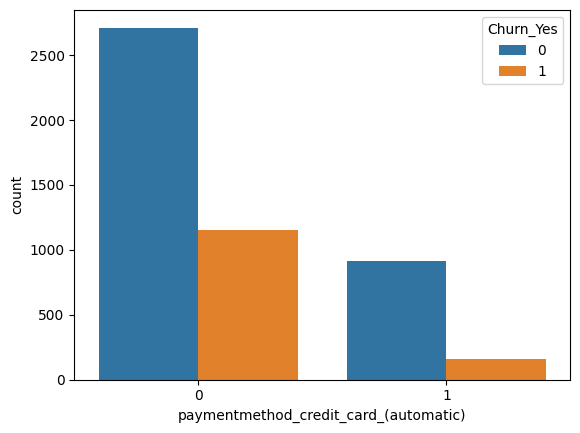

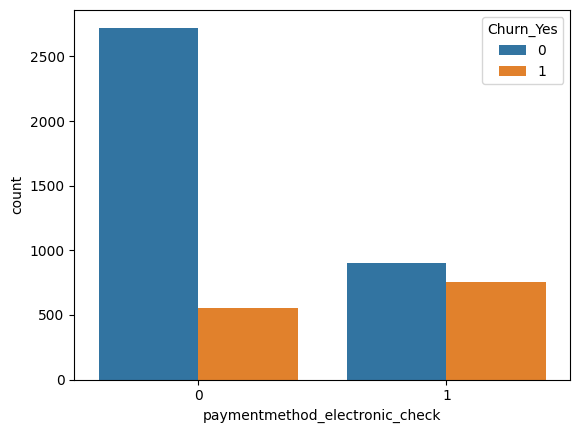

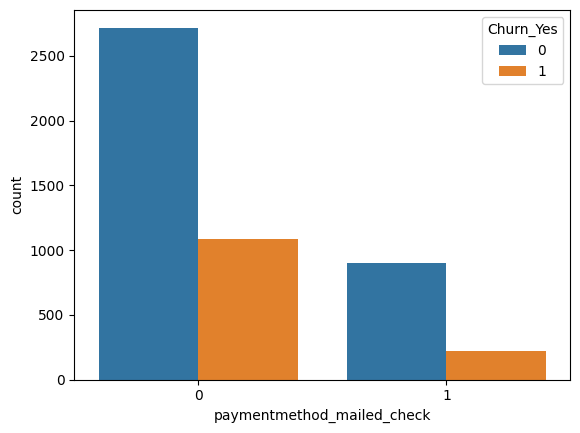

In [ ]:
for col in cat_cols:
  sbn.countplot(x=col, hue='Churn_Yes', data=temp_ds)
  plt.show()


In [ ]:
# -------------------------OBSERVATIONS----------------------------
# 1.seniorcitizen have for tend to churn , 2.those who not partner with the have more chances to churn,
# 3.those who have dependents have tend to stay and opposite is true for those who dont have dependents
# 4. those who have multiplelines they have for tend to churn than who does not have ,
# 5. thsoe who have internetservice_fiber_optic have so high chance to churn than who does not have.
# 6. those who have not internet_service they are likly to stay or tend to stay , and opposite for those have internetservice
# 7. those who have onlinesecurity_no_internet_service they have tend to stay, and opposite for those who have not
# 8. -inshor- : those dont have internet service , they are more likly to stay than those who have and those who have optical internet those are more than who does not have internet.
# 9. those who stream in tv have high chance to churn ,
# 10. those have contract they mostly of them have tend to stay.
## 11. those who have papaerlessbilling have significant chance to churn.,
# 12.those who have payment method electronic have significant chance to churn.

relations churn with continuous variables

In [ ]:
c = [col for col in X_train.columns if X_train[col].nunique()>2 ]
c

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
temp_ds = pd.concat([X_train[c] ,y_train ] , axis= 1)
temp_ds

,tenure,monthlycharges,totalcharges,Churn_Yes
5557,5,80.20,384.25,0
2270,3,86.85,220.95,1
6930,3,75.15,216.75,1
2257,60,80.55,4847.05,0
898,12,98.90,1120.95,1
...,...,...,...,...
4250,63,104.50,6590.80,0
1488,1,51.25,51.25,0
6303,71,109.25,7707.70,0
2710,24,20.40,482.80,0


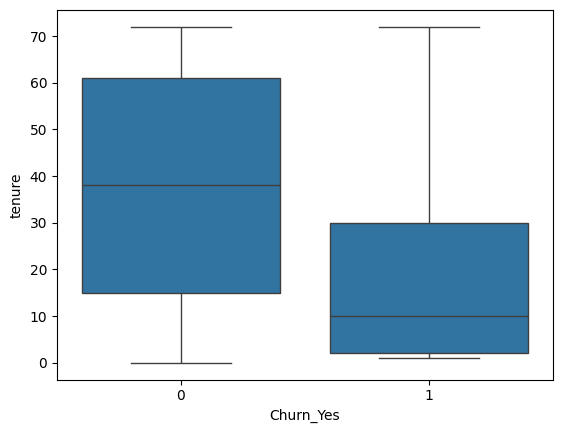

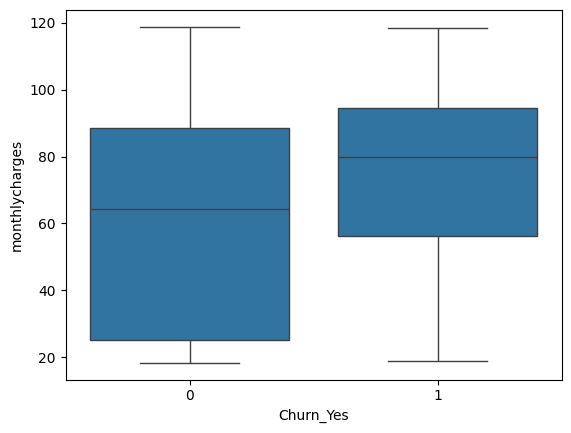

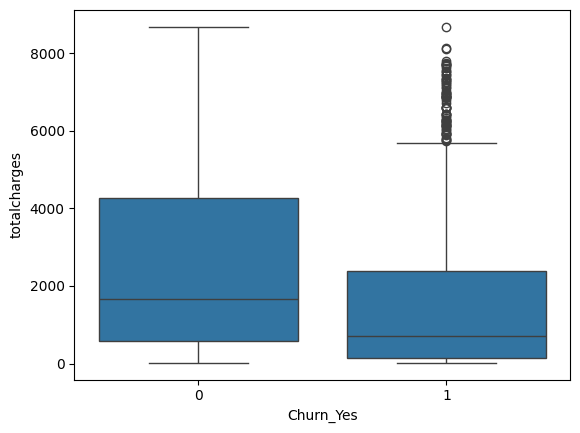

In [ ]:
for col in c:
  sbn.boxplot(x='Churn_Yes', y=col, data=temp_ds)
  plt.show()

In [ ]:
#---------------------- OVSERVATION-----------------------------
# 1. (tenure vs churn) : those who churned they have  lower tenure median value (10) , and small IQR(AROUND 1 - 29)
# 2.(tenure vs churn) : those who not churned have higher median (50) and have higher IQR than who churned
# 3. (totalcharges vs churn): here  churner have so many high outlier,  churner have lower median than not churner ,low IQR
# 4. (totalcharges vs churn): those who did not churn have high IQR of charges, and have higher median.
# 5. (monthlycharges vs churn): here churner have higher median values but lower IQR compare to not churner
# 6. (monthlycharges vs churn): And those who did not churned have high IQR , but lower median

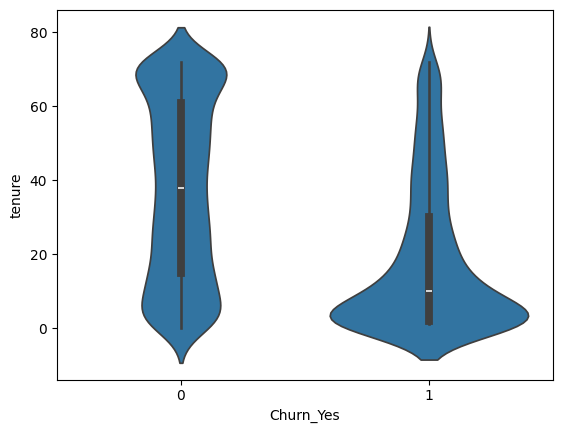

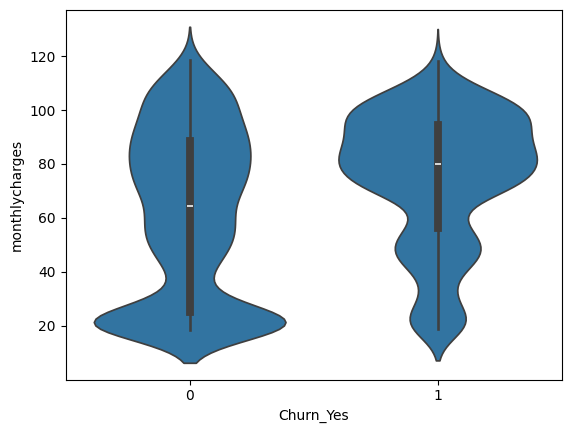

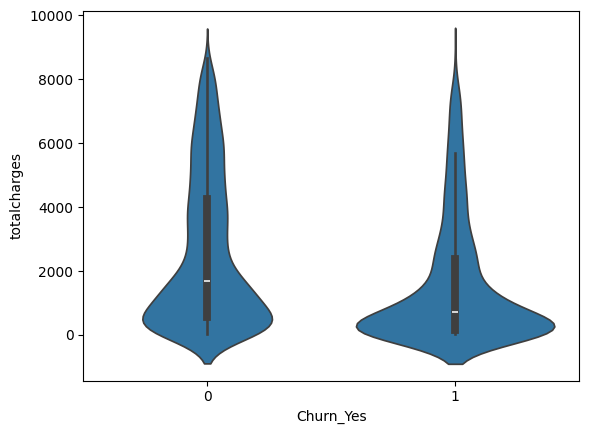

In [ ]:
for col in c:
  sbn.violinplot(x= 'Churn_Yes', y=col, data=temp_ds)
  plt.show()

VIF - multicolinearity check

In [ ]:
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
temp_full_df = pd.concat([X_train , y_train] , axis= 1 )


In [ ]:
temp_full_df = add_constant(temp_full_df)


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = temp_full_df.columns

vif_data['VIF'] = [ variance_inflation_factor(temp_full_df.values , i) for i in range(temp_full_df.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_data

,feature,VIF
0,const,0.000000
1,seniorcitizen,1.151769
2,tenure,7.555061
3,monthlycharges,854.316524
4,totalcharges,10.982106
5,gender_male,1.005629
6,partner_yes,1.447228
7,dependents_yes,1.368183
8,phoneservice_yes,inf
9,multiplelines_no_phone_service,inf


I have generated a heatmap showing the correlation matrix of your features in X_train.
The heatmap is saved as 'feature_correlation_heatmap.png'.


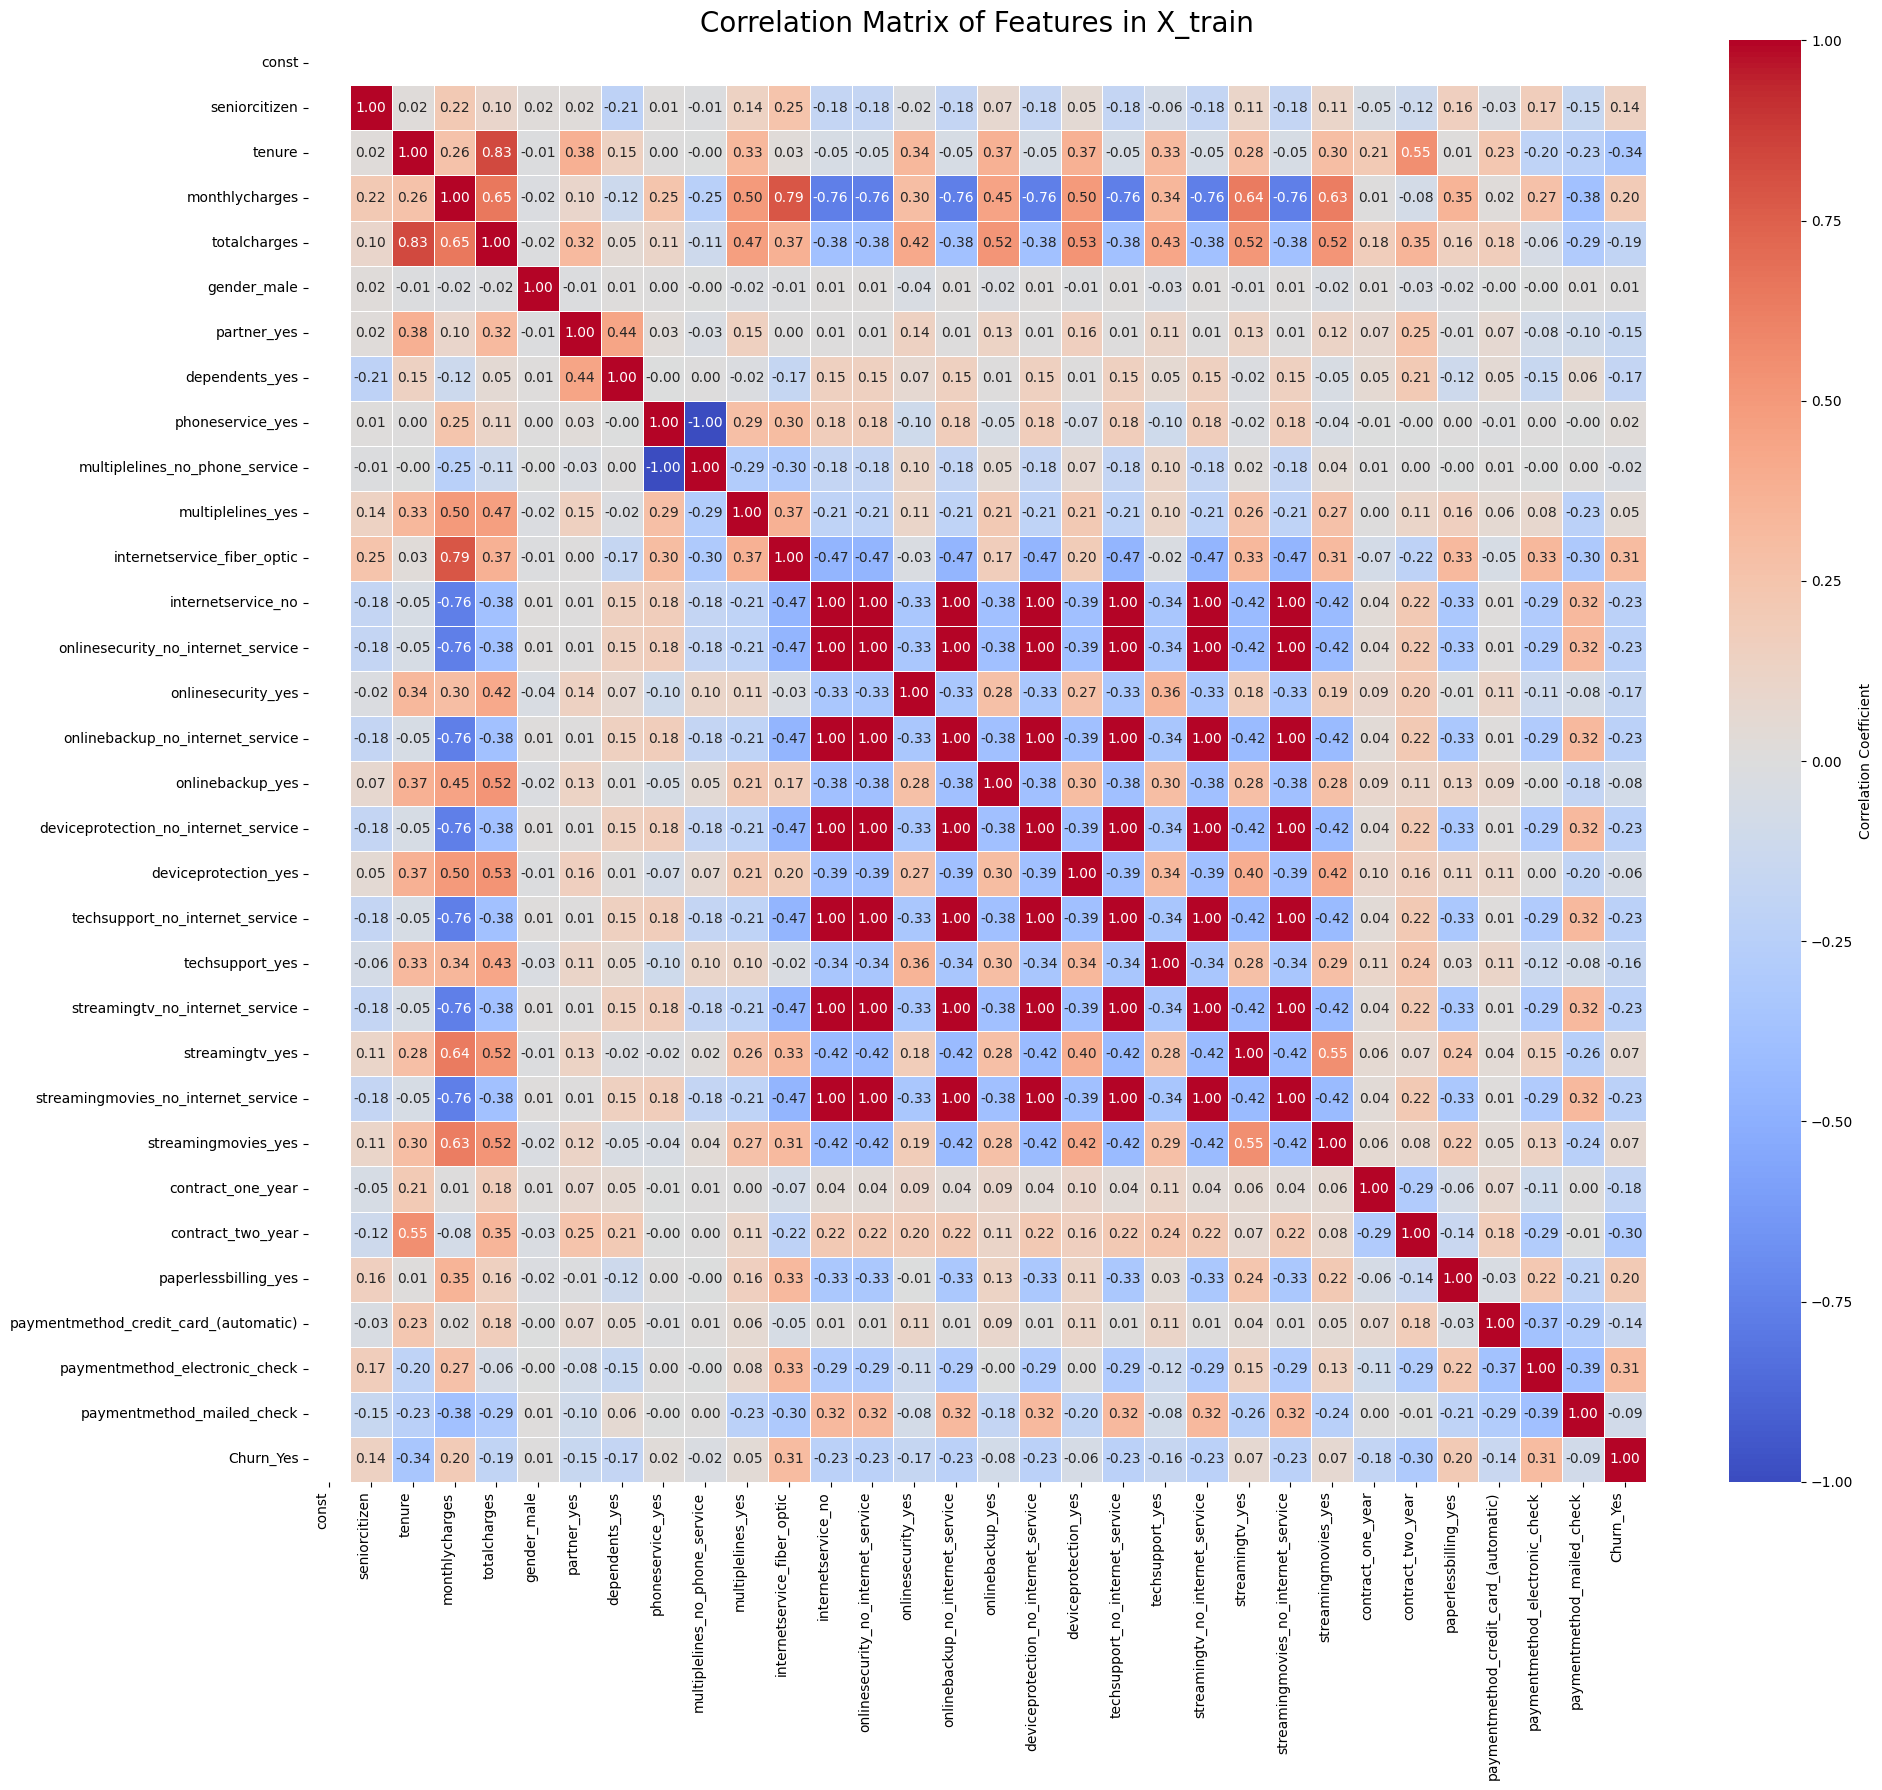

In [ ]:
# Calculate the correlation matrix for X_train
corr_matrix = temp_full_df.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(20, 18)) # Adjust size for readability with more features

# Create a heatmap
# 'annot=False' to avoid cluttering with numbers on cells, relying on color bar
# 'cmap' for color scheme
# 'fmt=".2f"' if annot=True, displays 2 decimal places
sbn.heatmap(corr_matrix, cmap='coolwarm',annot= True ,fmt=".2f", linewidths=.5 ,cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features in X_train', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=10) # Rotate x-axis labels for readability
plt.yticks(rotation=0, fontsize=10) # Keep y-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot
# plt.savefig('feature_correlation_heatmap.png')
# plt.close()

print("I have generated a heatmap showing the correlation matrix of your features in X_train.")
print("The heatmap is saved as 'feature_correlation_heatmap.png'.")

In [ ]:
# ---------- FEATURES TO BE DROP --------------
# ['totalcharges' ,
#  'multiplelines_no_phone_service' ,
#  'onlinesecurity_no_internet_service' ,
#  'onlinebackup_no_internet_service' ,
#  'deviceprotection_no_internet_service' ,
#  'techsupport_no_internet_service' ,
#  'streamingtv_no_internet_service',
#  'streamingmovies_no_internet_service']

In [ ]:
featuresToBeDroped = ['totalcharges' , 'multiplelines_no_phone_service' , 'onlinesecurity_no_internet_service' , 'onlinebackup_no_internet_service' , 'deviceprotection_no_internet_service' , 'techsupport_no_internet_service' , 'streamingtv_no_internet_service', 'streamingmovies_no_internet_service']

In [ ]:
# Drop the features from all three datasets
X_train = X_train.drop(columns=featuresToBeDroped)
X_val = X_val.drop(columns=featuresToBeDroped)
X_test = X_test.drop(columns=featuresToBeDroped)

In [ ]:
temp_df = pd.concat([X_train , y_train] , axis= 1)

<Axes: >

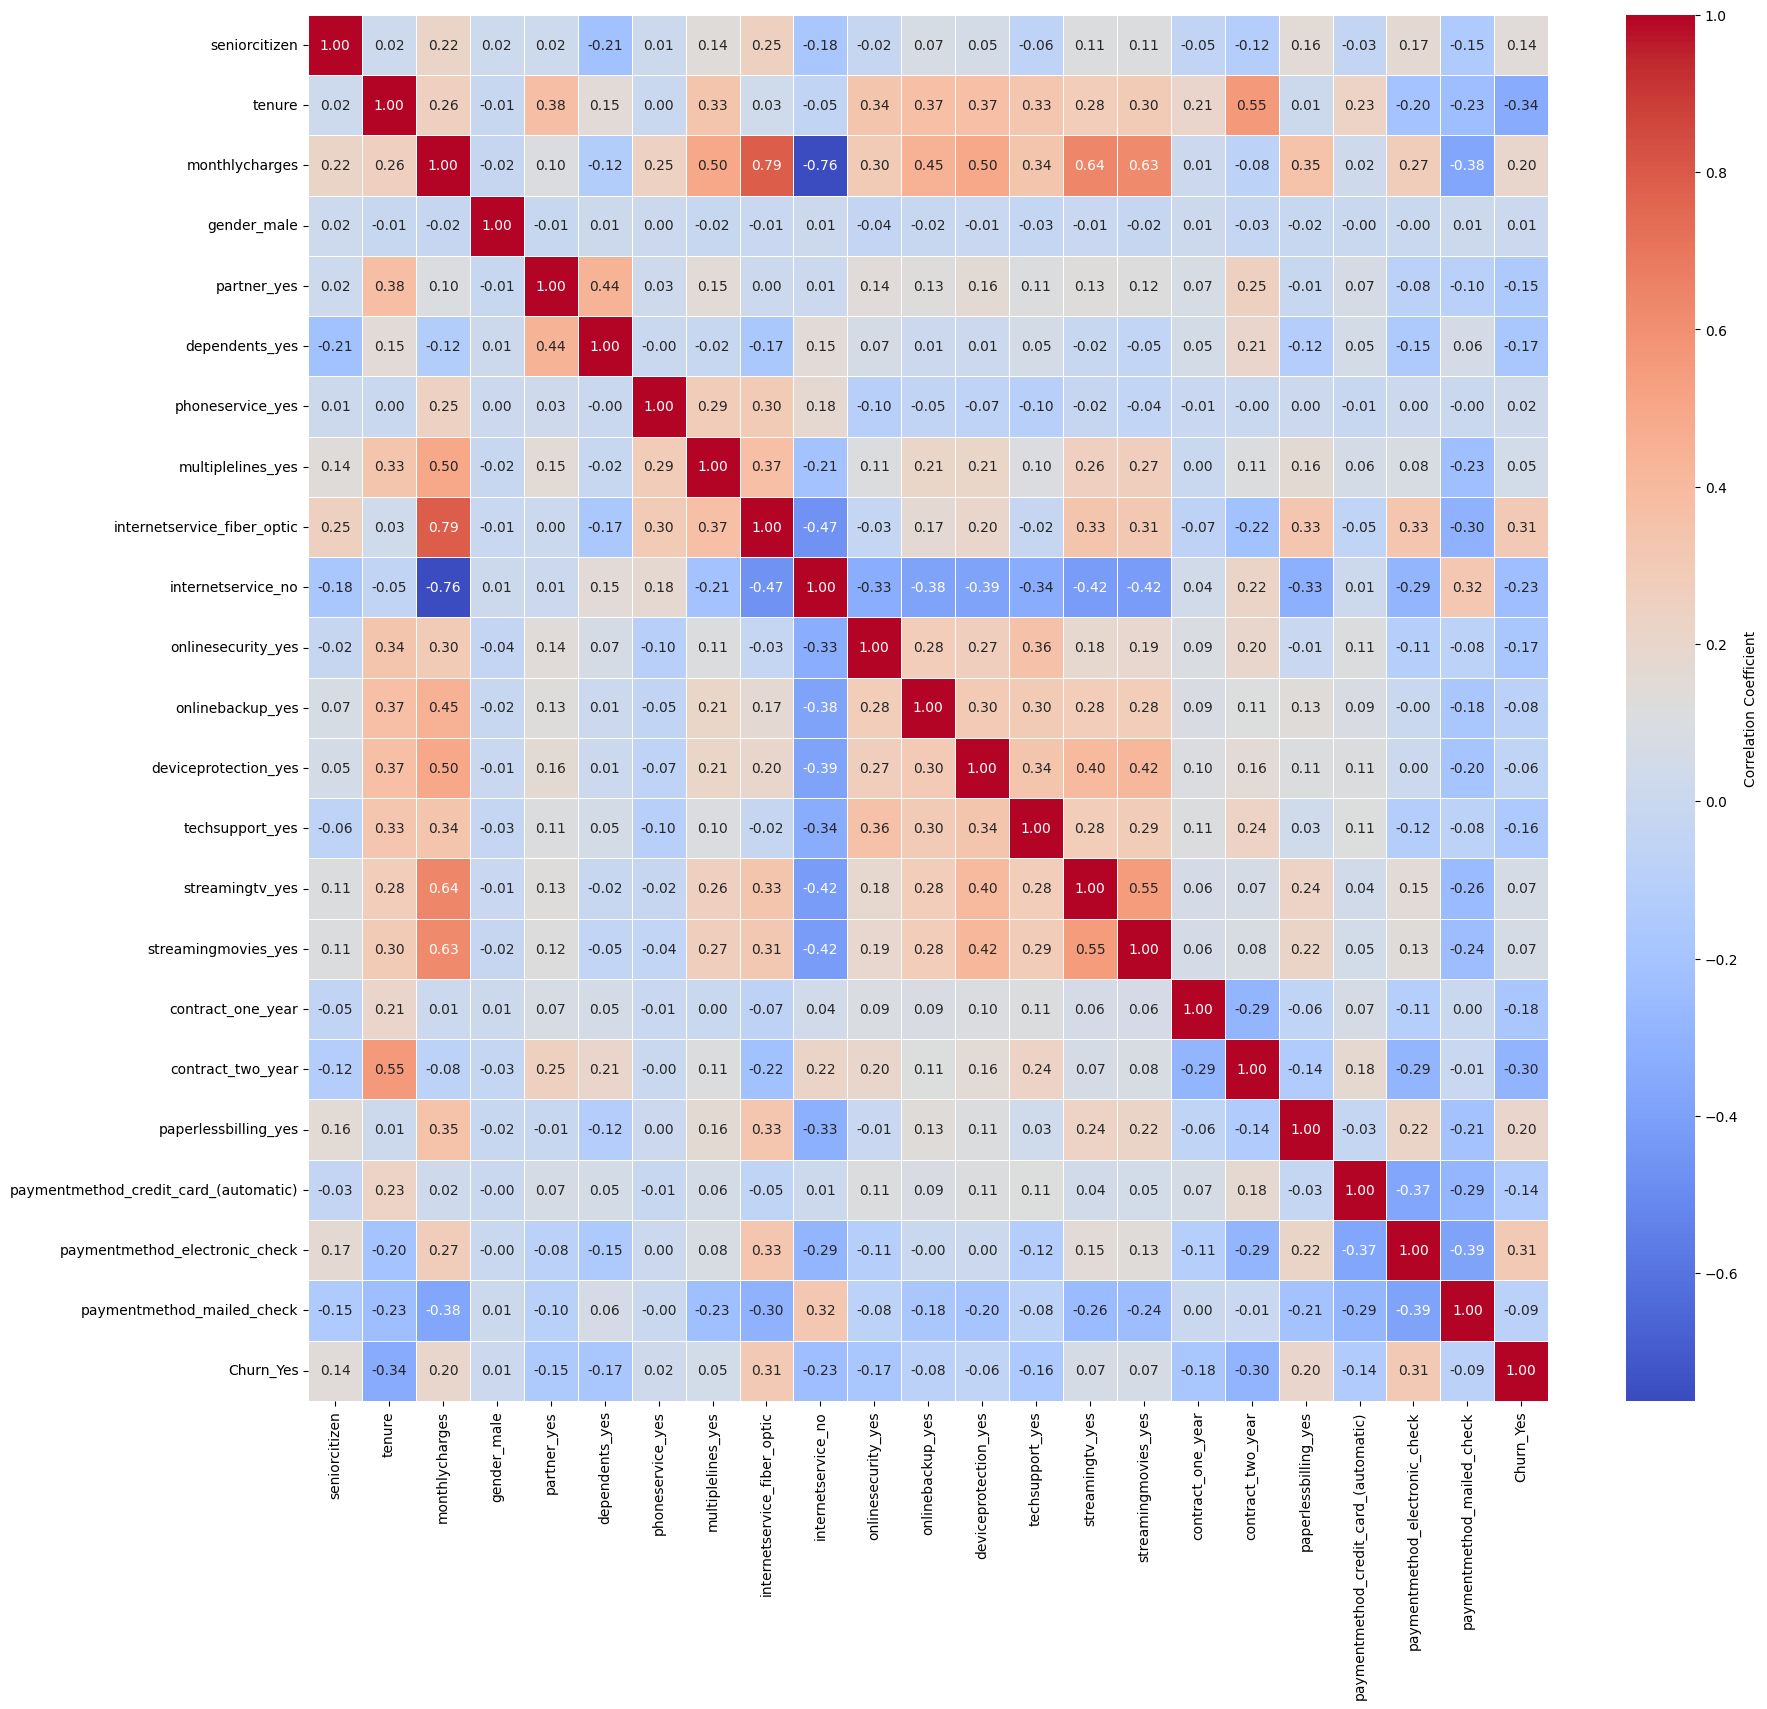

In [ ]:
corr_matrix = temp_df.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(20, 18)) # Adjust size for readability with more features

# Create a heatmap
# 'annot=False' to avoid cluttering with numbers on cells, relying on color bar
# 'cmap' for color scheme
# 'fmt=".2f"' if annot=True, displays 2 decimal places
sbn.heatmap(corr_matrix, cmap='coolwarm',annot= True ,fmt=".2f", linewidths=.5 ,cbar_kws={'label': 'Correlation Coefficient'})

Feature scaling

In [ ]:
feature_to_scale = ['tenure' ,'monthlycharges' ]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train[feature_to_scale] = ss.fit_transform(X_train[feature_to_scale])


In [ ]:
X_val[feature_to_scale] = ss.fit_transform(X_val[feature_to_scale])
X_test[feature_to_scale] = ss.fit_transform(X_test[feature_to_scale])